In [134]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import string
printable = set(string.printable)

In [135]:
data = pd.read_csv('youtubedata.csv')

In [136]:
data.shape

(10333, 5)

In [137]:
data.head()

,Unnamed: 0,Video Id,Title,Description,Category
0,0,ehmsJLZlCZ0,Ep 1| Travelling through North East India | Of...,"The journey to Arunachal, North East India beg...",travel
1,1,e2NQE41J5eM,How do I travel so much ! How do I earn money!!,SUBSCRIBE - https://goo.gl/dEtSMJ ('MountainTr...,travel
2,2,i9E_Blai8vk,TRAVEL VLOG ∙ Welcome to Bali | PRISCILLA LEE,I had the chance to fly out to Bali with my wh...,travel
3,3,-LzdIILq5vE,GOA TRAVEL DIARY | FOUR DAYS IN GOA | TRAVEL O...,Hope you enjoy MY GOA TRAVEL DIARY this video!...,travel
4,4,7ByoBJYXU0k,5 Steps to Becoming a Travel Blogger,"Travel blogger, Nikki Vargas, of The Pin the M...",travel


In [138]:
data['Title'] = data['Title'].astype('str')
data['Title'] = data['Title'].str.replace(',', '')

In [139]:
data['Description'] = data['Description'].astype('str')
data['Description'] = data['Description'].str.replace(',', '')

In [140]:
from numpy import  nan
d = []
for v in data.values:
    if v[2]==nan or v[3]==nan:
        print("Here")
        continue
    else:
        d.append(list(v))

In [130]:
data = pd.DataFrame(d,columns = ['un','ID','Title','Description','Category'])

In [131]:
data.shape

(10333, 5)

In [110]:
cltype = list(data['Category'].value_counts().index)
number = list(data['Category'].value_counts().values)

In [120]:
data.shape

(10333, 5)

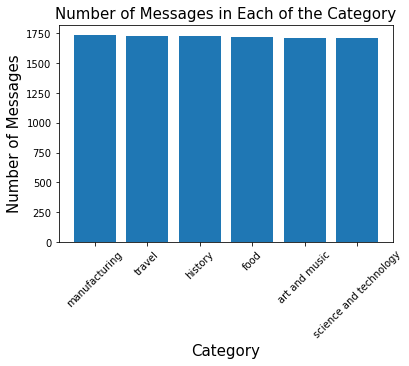

In [111]:
plt.bar(cltype,number)
plt.xticks( cltype, rotation=45)
plt.ylabel("Number of Messages",size=15)
plt.xlabel("Category",size=15)
plt.title("Number of Messages in Each of the Category",size=15)
plt.show()

In [112]:
data.dropna(inplace = True)

- from the above bar plot we can see that our dataset is equally balanced, so for the final evaluation we can use accuracy score as an evaluation metric

### Data Cleaning

In [113]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"haven't", "will not", phrase)
    phrase = re.sub(r"wasn\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

### cleaning the title

In [114]:
# Combining all the above stundents 
from tqdm import tqdm
title = []
# tqdm is for printing the status bar
for sentance in tqdm(data['Title'].values):
    try:
        sentance = ''.join(filter(lambda x: x in printable, sentance))
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split())
        sentance = decontracted(sentance)
        title.append(sentance.strip())
    except:
        title.append([])

100%|██████████████████████████████████████████████████████████████████████████| 10333/10333 [00:06<00:00, 1481.78it/s]


### Cleaning the Description

In [115]:
# Combining all the above stundents 
from tqdm import tqdm
description = []
# tqdm is for printing the status bar
for sentance in tqdm(data['Description'].values):
    try:
        sentance = ''.join(filter(lambda x: x in printable, sentance))
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split())
        sentance = decontracted(sentance)
        description.append(sentance.strip())
    except:
        description.append([])

100%|██████████████████████████████████████████████████████████████████████████| 10333/10333 [00:06<00:00, 1575.76it/s]


In [116]:
data['Title'] = title
data['Description'] = description

In [117]:
data.head()

,Unnamed: 0,Video Id,Title,Description,Category
0,0,ehmsJLZlCZ0,ep travelling through north east india off to ...,the journey to arunachal north east india begi...,travel
1,1,e2NQE41J5eM,how do i travel so much how do i earn money,subscribe mountaintrekker gimbal if you have a...,travel
2,2,i9E_Blai8vk,travel vlog welcome to bali priscilla lee,i had the chance to fly out to bali with my wh...,travel
3,3,-LzdIILq5vE,goa travel diary four days in goa travel outfi...,hope you enjoy my goa travel diary this video ...,travel
4,4,7ByoBJYXU0k,steps to becoming a travel blogger,travel blogger nikki vargas of the pin the map...,travel


In [118]:
data.shape

(10333, 5)

In [119]:
data.to_csv('cleaned_data.csv',index = False)